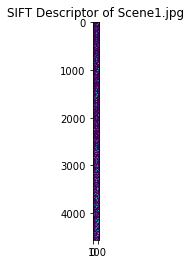

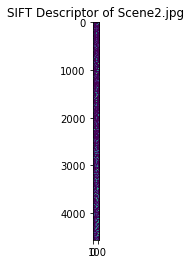

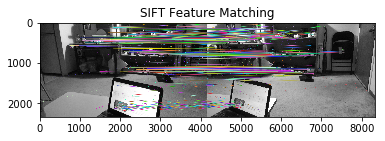

(<matplotlib.image.AxesImage at 0x26f83d9a898>, None)

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('scene1.jpg',0)          # queryImage
img2 = cv2.imread('scene2.jpg',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

#print (kp1)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.title('SIFT Descriptor of Scene1.jpg')
plt.imshow(des1)
plt.show()
plt.title('SIFT Descriptor of Scene2.jpg')
plt.imshow(des1)
plt.show()
plt.title('SIFT Feature Matching')
plt.imshow(img3),plt.show()




References:

1. http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
2. http://www.pyimagesearch.com/2015/07/16/where-did-sift-and-surf-go-in-opencv-3/ 
3. D.G. Lowe. Distinctive image features from scale-invariant keypoints.International Journal of Computer Vision, 2(60):91–110, 2004.